In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import warnings

In [6]:
warnings.filterwarnings('ignore')

In [35]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [9]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [10]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [11]:
train.dtypes.value_counts()

int64      8
float64    3
object     1
dtype: int64

In [12]:
train.apply(pd.Series.nunique)

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

### 要預測的是count

In [18]:
train.dtypes.apply(pd.Series)

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


(array([4284., 2337., 1686., 1067.,  633.,  426.,  233.,  116.,   85.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

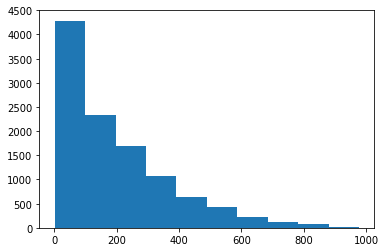

In [24]:
plt.hist(train['count'])

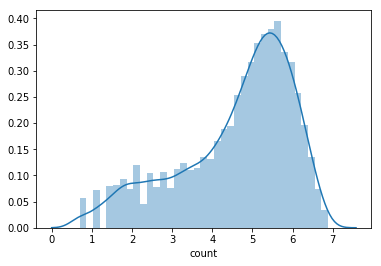

In [25]:
sns.distplot(np.log1p(train['count']))

In [26]:
y_train = train['count']

In [28]:
y_train.shape

(10886,)

In [36]:
train_X = train.drop(['registered', 'casual', 'count'], axis=1)

In [37]:
data = train_X.append(test)

In [38]:
data.shape

(17379, 9)

In [39]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.028770,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540
std,1.106918,0.167165,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900


In [41]:
data.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,17379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-11-07 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.501640,0.028770,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540
std,NaN,1.106918,0.167165,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795
min,NaN,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000
75%,NaN,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900


### 看起來沒有缺失值，但仍要檢查是否有異常值

### 檢查temp、atemp、humidity、windspeed這幾項
### 另外可以用LinearRegression看能否將temp和atemp去做回歸

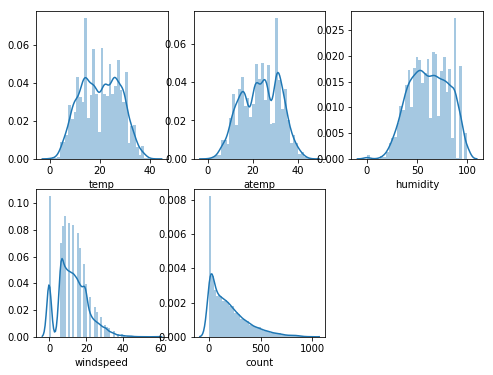

In [49]:
plot_list = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

plt.figure(figsize=(8, 6))
for number, i in enumerate(plot_list):
    plt.subplot(2, 3, number+1)
    sns.distplot(train[i])

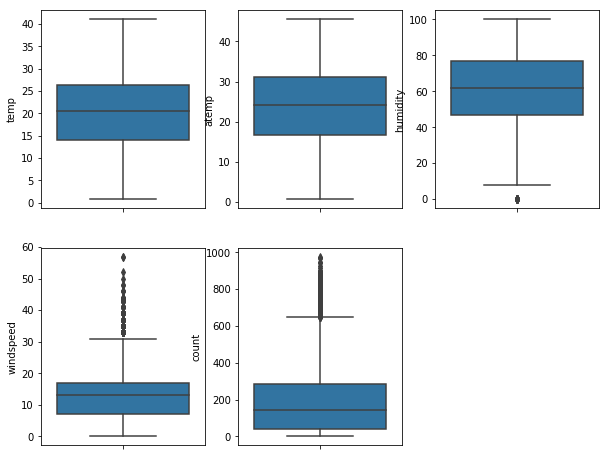

In [101]:
plot_list = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

plt.figure(figsize=(10, 8))
for number, i in enumerate(plot_list):
    plt.subplot(2, 3, number+1)
    sns.boxplot(train[i], orient='v')

### 看起來windspeed有較奇怪的值，先來檢查一下temp、atemp、humidity之間是否有關係吧

### 使用相關係數並用heatmap排序後找到最相關係數

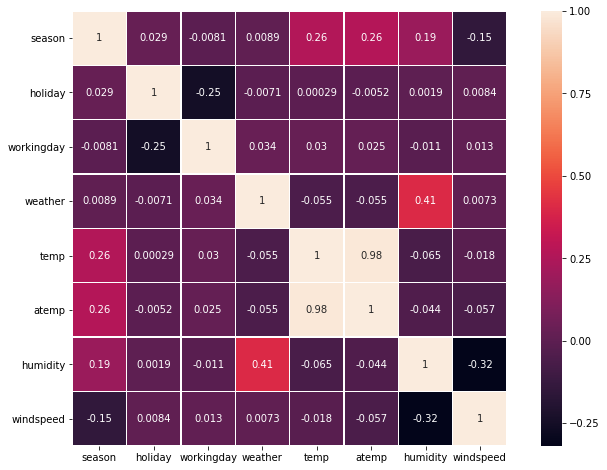

In [105]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_X.corr(), annot=True, square=True, linewidths=0.2)

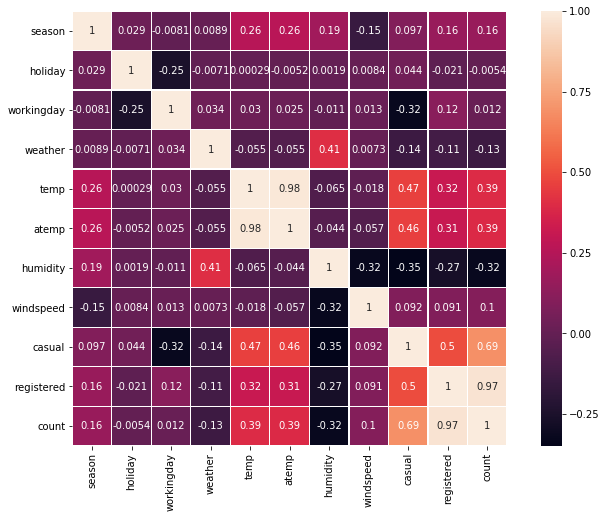

In [104]:
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, square=True, linewidths=0.2)

In [80]:
train_X.corr()['temp'].sort_values(ascending=False)

temp          1.000000
atemp         0.984948
season        0.258689
workingday    0.029966
holiday       0.000295
windspeed    -0.017852
weather      -0.055035
humidity     -0.064949
Name: temp, dtype: float64

### 從以上相關係數的排列來看，temp跟atemp有相當大關係，在去查一下兩者理論公式(參考)

### 體感溫度(°C)=溫度(°C)-2√風速(公尺/每秒)

### 依以上公式，風速(公尺/每秒) = ((溫度(°C) - 體感溫度(°C))/4)**2

In [143]:
train['windspeed_2'] = ((train['temp'] - train['atemp'])/4)**2

### 檢查一下是否有比原本數據好

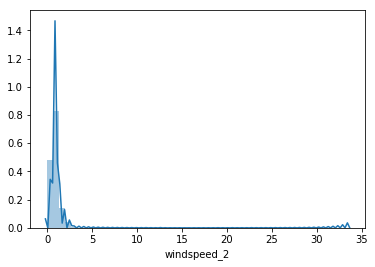

In [144]:
sns.distplot(train['windspeed_2'])

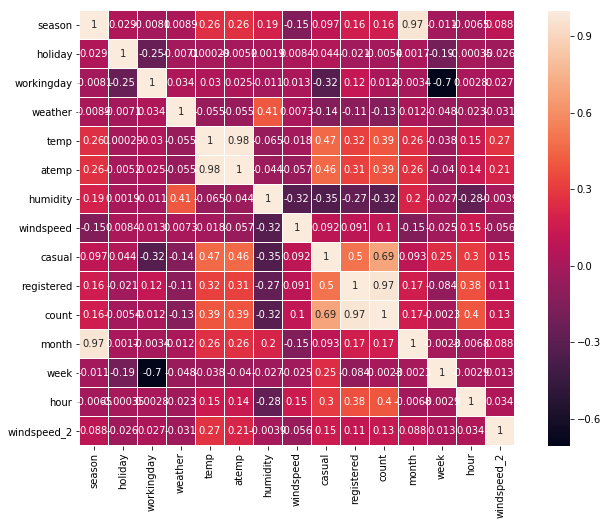

In [145]:
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, square=True, linewidths=0.2)

### 看起來效果不佳，我還找到另外一種風速的計算方式

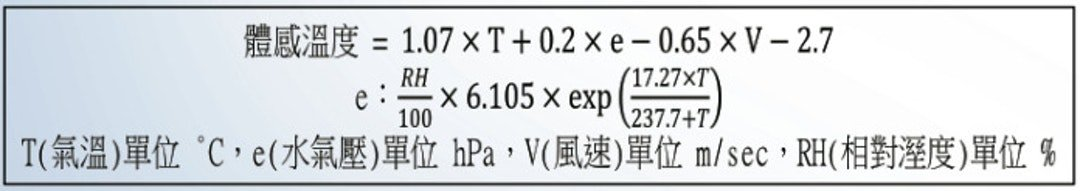

In [81]:
from sklearn.ensemble import GradientBoostingRegressor

D:\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### 檢查一下count是否有缺失值

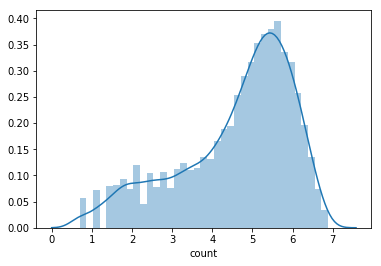

In [86]:
sns.distplot(np.log1p(y_train))

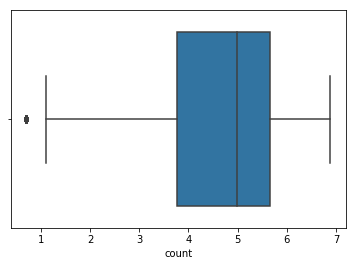

In [87]:
sns.boxplot(np.log1p(y_train))

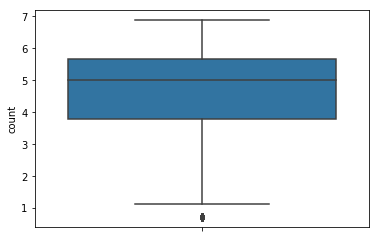

In [97]:
sns.boxplot(np.log1p(y_train), orient='v')

In [91]:
count=0
for i in np.log1p(y_train):
    if i<1:
        count += 1
    else:
        continue
print('Outlier : ', count)

Outlier :  105


### count的outlier的佔整個資料約105個

In [93]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0


In [128]:
data['datetime'] = pd.to_datetime(data['datetime'])
train['datetime'] = pd.to_datetime(train['datetime'])

In [96]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0


In [119]:
data['month'] = data['datetime'].dt.month
data['week'] = data['datetime'].dt.dayofweek
data['hour'] = data['datetime'].dt.hour
data['daty'] = data['datetime'].dt.strftime('%d')
data['date'] = data['datetime'].dt.date

In [130]:
train['month'] = train['datetime'].dt.month
train['week'] = train['datetime'].dt.dayofweek
train['hour'] = train['datetime'].dt.hour
train['daty'] = train['datetime'].dt.strftime('%d')
train['date'] = train['datetime'].dt.date
train['yearofmonth'] = train['datetime'].dt.strftime('%Y-%m')

In [120]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,week,hour,date,daty
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,1,5,0,2011-01-01,01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,1,5,1,2011-01-01,01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,1,5,2,2011-01-01,01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,1,5,3,2011-01-01,01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,5,4,2011-01-01,01


In [134]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,week,hour,daty,date,yearofmonth
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,0,01,2011-01-01,2011-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,01,2011-01-01,2011-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,5,2,01,2011-01-01,2011-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,5,3,01,2011-01-01,2011-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,5,4,01,2011-01-01,2011-01


In [125]:
import matplotlib.pyplot as plt

In [127]:
font={'family':'SimHi'}
plt.rc('font', **font)

In [135]:
group_date = train.groupby('date')['count'].median() #每天
group_month = train.groupby('yearofmonth')['count'].median() #每月

In [139]:
group_date.head()

date
2011-01-01    35.5
2011-01-02    22.0
2011-01-03    56.5
2011-01-04    57.0
2011-01-05    62.0
Name: count, dtype: float64

In [137]:
group_month.head()

yearofmonth
2011-01     47.0
2011-02     59.0
2011-03     72.0
2011-04     84.0
2011-05    154.0
Name: count, dtype: float64

In [138]:
group_month.index = pd.to_datetime(group_month.index)

In [140]:
group_month.head()

yearofmonth
2011-01-01     47.0
2011-02-01     59.0
2011-03-01     72.0
2011-04-01     84.0
2011-05-01    154.0
Name: count, dtype: float64

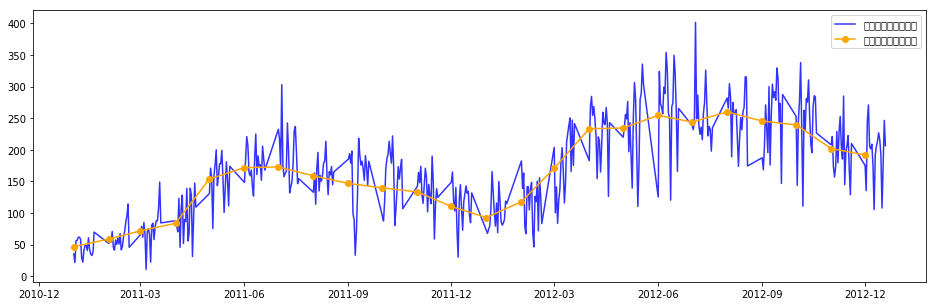

In [142]:
plt.figure(figsize=(16, 5)) #長條形
plt.plot(group_date.index, group_date.values, '-', color='b', label = '每天租賃數量中位數', alpha=0.8)
plt.plot(group_month.index, group_month.values, '-o', color='orange', label = '每月租賃數量中位數')
plt.legend()
plt.show()

In [121]:
from sklearn.preprocessing import StandardScaler

In [123]:
sc = StandardScaler()